# TM10007 Assignment template -- ECG data

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [2]:
# Run this to use from colab environment

import zipfile
import os
import pandas as pd

#with zipfile.ZipFile('ecg_data.zip', 'r') as zip_ref: #TODO: let hierop voor inleveren
#    zip_ref.extractall('ecg')

data = pd.read_csv('ecg/ecg_data.csv', index_col=0)

print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

data.head()

The number of samples: 827
The number of columns: 9001


,0_0,0_1,0_2,0_3,0_4,0_5,0_6,0_7,0_8,0_9,...,11_741,11_742,11_743,11_744,11_745,11_746,11_747,11_748,11_749,label
0,47.685046,48.416904,37.371002,61.604757,58.732738,213.067966,120.890451,40.100639,19.106303,6.043738,...,0.078753,0.379885,0.182930,0.231552,0.222432,0.154919,0.158616,0.269249,0.112248,0
1,152.726718,297.353726,111.168880,25.419423,14.636085,24.609688,49.533842,253.651571,483.852043,167.617409,...,0.804160,0.809705,0.830032,0.774368,0.798178,0.853519,0.827946,0.859936,0.742673,1
2,1.601260,3.882169,22.978997,21.673040,8.919484,18.329286,27.710604,23.350084,37.896254,8.331180,...,0.156080,0.102070,0.168276,0.120385,0.064254,0.077670,0.059857,0.098506,0.098288,0
3,1.388947,3.052483,3.084103,4.627886,10.016196,15.020347,139.823127,20.149108,10.393109,9.241921,...,0.238274,0.096733,0.030739,0.170214,0.052079,0.179360,0.226222,0.092000,0.192559,0
4,3.625561,3.728466,6.205367,17.722897,5.699401,9.024836,15.782812,33.336480,55.257804,19.139128,...,0.056914,0.059116,0.050098,0.152588,0.129712,0.047342,0.058446,0.141610,0.129477,0


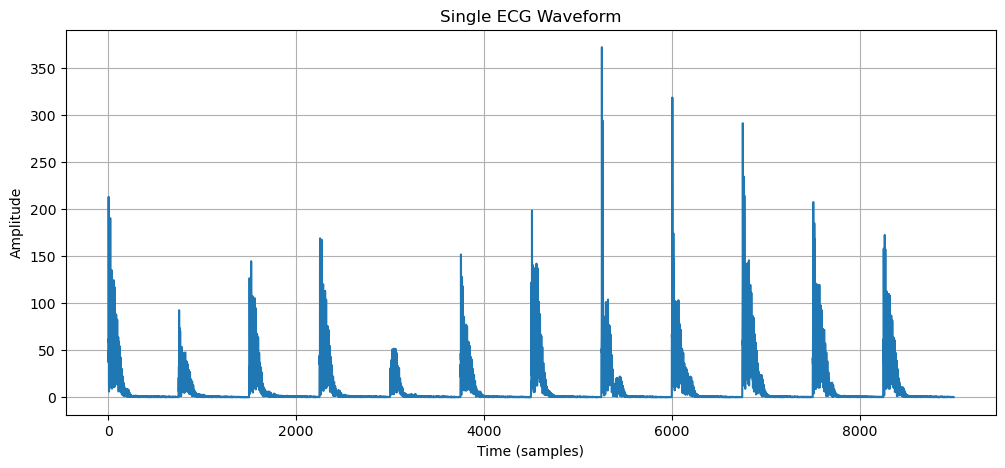

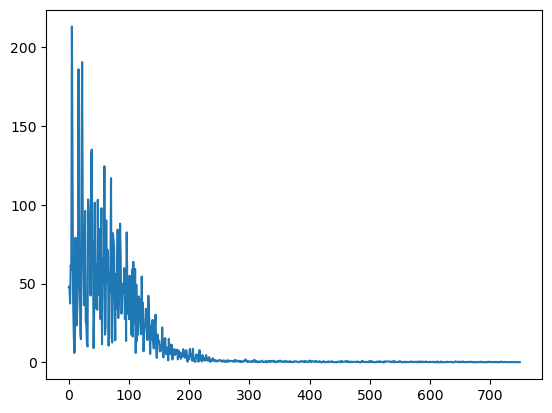

In [3]:
import matplotlib.pyplot as plt

# Select the first row (single ECG waveform)
sample_ecg = data.iloc[0, :-1]  # Exclude index and label

# Plot the ECG waveform
plt.figure(figsize=(12, 5))  # Set figure size
plt.plot(sample_ecg.values)  # Plot the data
plt.title('Single ECG Waveform')  # Add title
plt.xlabel('Time (samples)')  # Label for x-axis
plt.ylabel('Amplitude')  # Label for y-axis
plt.grid(True)  # Add grid for better readability
plt.show()

plt.plot(sample_ecg.values[:750])
plt.show()

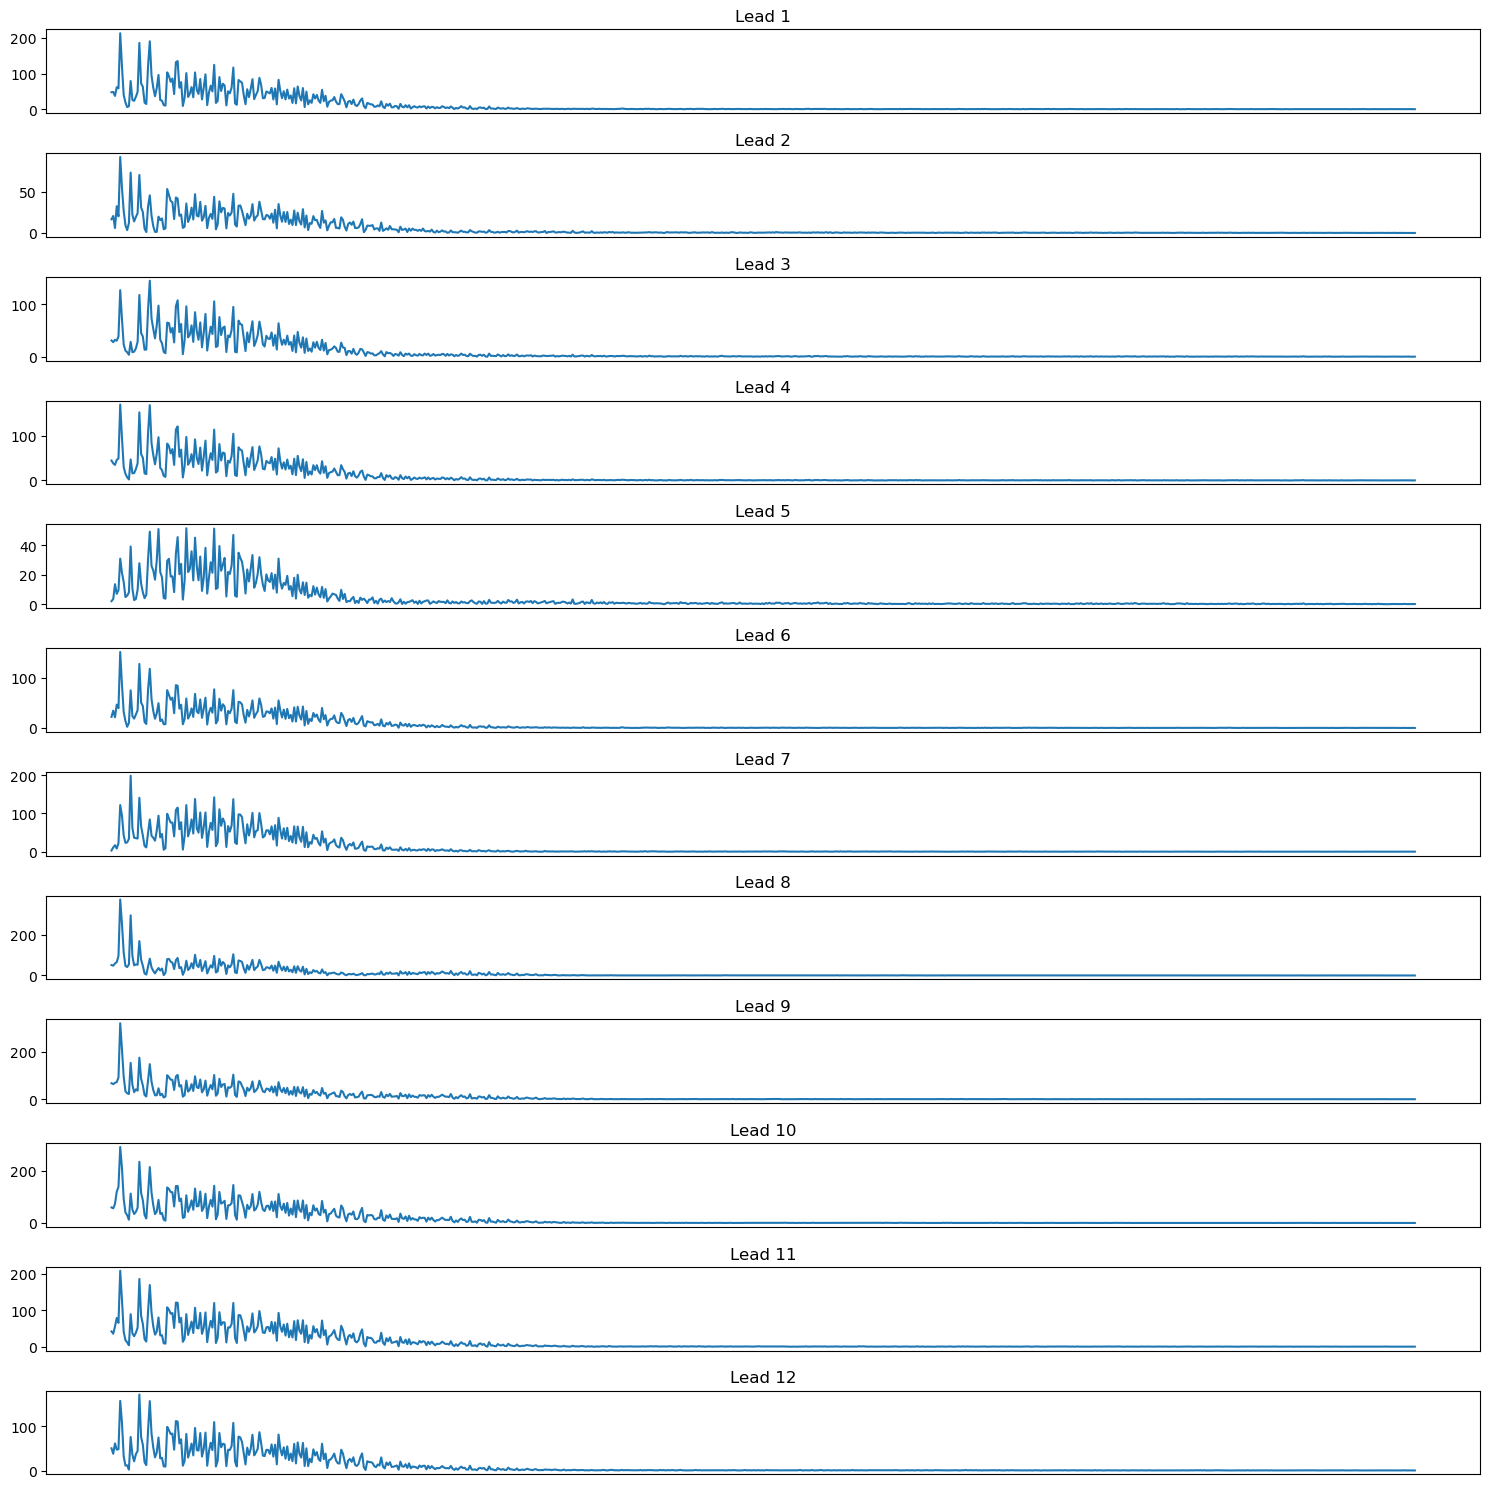

In [22]:
import matplotlib.pyplot as plt

# Select the first row (single ECG waveform)
sample_ecg = data.iloc[0, :-1]  # Exclude index and label

num_leads = 12
lead_size = 750

fig, axes = plt.subplots(num_leads, 1, figsize=(15, 15))
axes = axes.flatten()

# Loop through each lead
for i, ax in enumerate(axes):
    lead_start = i * lead_size       # Calculate the start index of the lead
    lead_end = (i + 1) * lead_size  # Calculate the end index of the lead
    lead = sample_ecg[lead_start:lead_end]  # Extract the lead data

    ax.plot(lead)  # Plot the lead
    ax.set_title(f'Lead {i+1}')  # Add title

    # Remove x-axis ticks and labels
    ax.set_xticks([])
    ax.set_xticklabels([])

plt.tight_layout()  # Adjust the subplots to fit into the figure
plt.show()

Accuracy: 0.7590361445783133
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       137
           1       0.39      0.66      0.49        29

    accuracy                           0.76       166
   macro avg       0.65      0.72      0.66       166
weighted avg       0.82      0.76      0.78       166



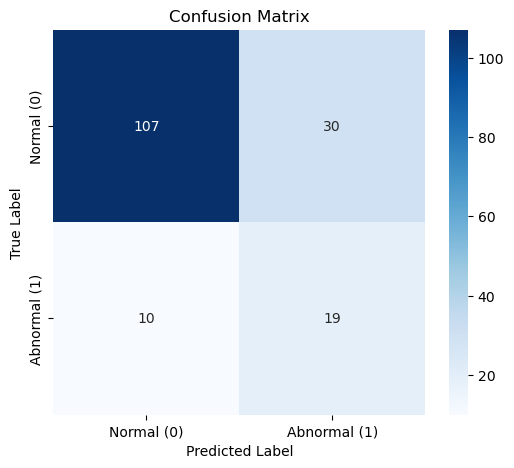

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming the first columns are features, and the last column is the label
X = data.iloc[:, :-1].values  # Features (ECG frequency data)
y = data.iloc[:, -1].values   # Labels (0 = Normal, 1 = Abnormal)

# Stratified train-test split (ensures same ratio of normal/abnormal in train/test sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Select top K features based on mutual information
selector = SelectKBest(mutual_info_classif, k=100)  # Select top 100 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=150, max_depth=3, random_state=42, class_weight={0: 1, 1: 7}, n_jobs=-1)
rf.fit(X_train_selected, y_train)

# Make predictions
y_pred = rf.predict(X_test_selected)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal (0)", "Abnormal (1)"], yticklabels=["Normal (0)", "Abnormal (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

PCA (All Features) Components Retained: 117
PCA (Selected Features) Components Retained: 43


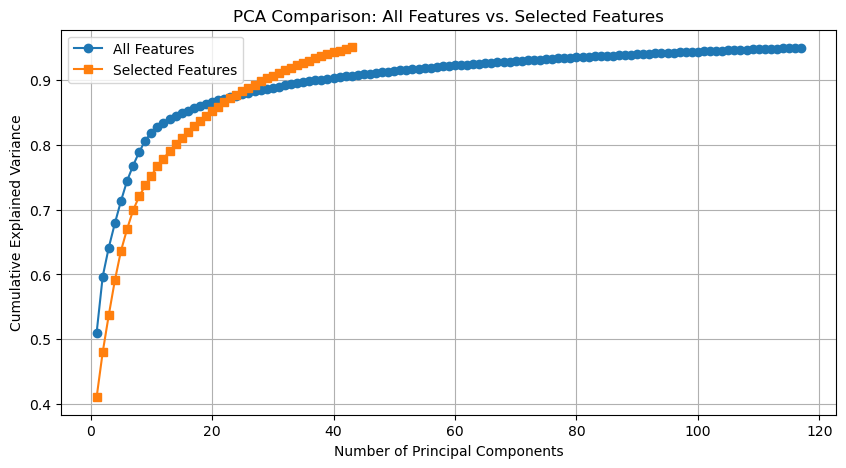

Cumulative Explained Variance (All Features): 0.9501
Cumulative Explained Variance (Selected Features): 0.9508


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming the first columns are features, and the last column is the label
X = data.iloc[:, :-1].values  # Features (ECG frequency data)
y = data.iloc[:, -1].values   # Labels (0 = Normal, 1 = Abnormal)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### PCA on All Features - Capture 95% Variance ###
pca_full = PCA(n_components=0.95)  # Select enough components to explain 95% variance
X_train_pca_full = pca_full.fit_transform(X_train_scaled)
explained_variance_full = np.cumsum(pca_full.explained_variance_ratio_)

# Print components retained
print(f"PCA (All Features) Components Retained: {pca_full.n_components_}")

### Select Features using Mutual Information ###
mi_scores = mutual_info_classif(X_train_scaled, y_train)
mi_feature_indices = np.argsort(mi_scores)[-100:]  # Select top 100 features
X_train_mi = X_train_scaled[:, mi_feature_indices]

### PCA on Selected Features - Capture 95% Variance ###
pca_selected = PCA(n_components=0.95)  
X_train_pca_selected = pca_selected.fit_transform(X_train_mi)
explained_variance_selected = np.cumsum(pca_selected.explained_variance_ratio_)

# Print components retained
print(f"PCA (Selected Features) Components Retained: {pca_selected.n_components_}")

### Plot Cumulative Explained Variance ###
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_full) + 1), explained_variance_full, label="All Features", marker='o')
plt.plot(range(1, len(explained_variance_selected) + 1), explained_variance_selected, label="Selected Features", marker='s')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Comparison: All Features vs. Selected Features")
plt.legend()
plt.grid()
plt.show()

### Print Final Cumulative Explained Variance ###
print(f"Cumulative Explained Variance (All Features): {explained_variance_full[-1]:.4f}")
print(f"Cumulative Explained Variance (Selected Features): {explained_variance_selected[-1]:.4f}")

c:\Users\groot\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\groot\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\groot\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.83      1.00      0.90       137
           1       0.00      0.00      0.00        29

    accuracy                           0.83       166
   macro avg       0.41      0.50      0.45       166
weighted avg       0.68      0.83      0.75       166

Accuracy (No Feature Selection): 0.8253
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       137
           1       0.58      0.24      0.34        29

    accuracy                           0.84       166
   macro avg       0.72      0.60      0.62       166
weighted avg       0.81      0.84      0.81       166

Accuracy (Mutual Information Selected Features): 0.8373


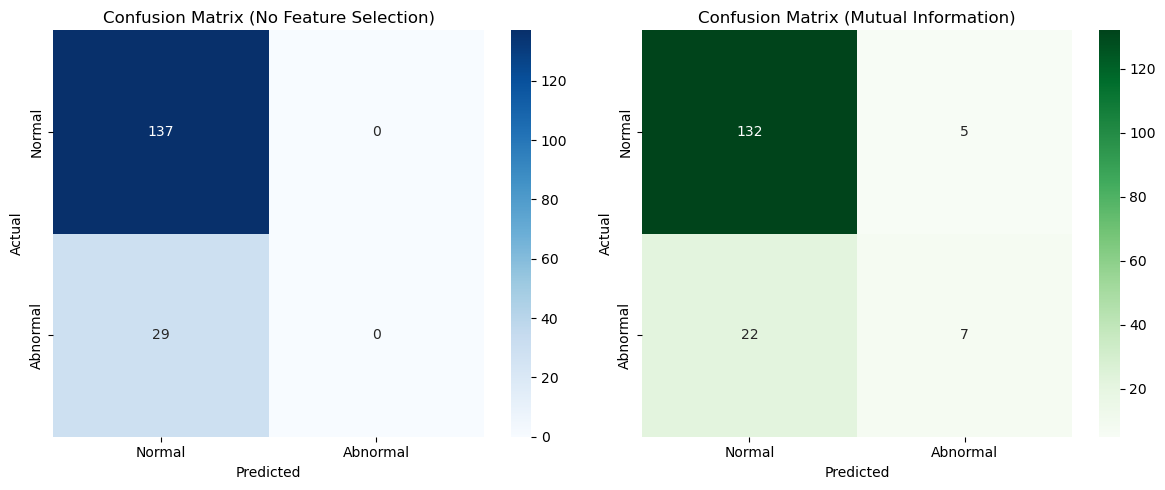

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset (Replace with your data)
# data = pd.read_csv("your_data.csv")  # Uncomment this if using your dataset

# Assuming the first columns are features, and the last column is the label
X = data.iloc[:, :-1].values  # Features (ECG frequency data)
y = data.iloc[:, -1].values   # Labels (0 = Normal, 1 = Abnormal)

# Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1️⃣ Train Random Forest Without Feature Selection ###
rf_no_fs = RandomForestClassifier(random_state=42)
rf_no_fs.fit(X_train_scaled, y_train)
y_pred_no_fs = rf_no_fs.predict(X_test_scaled)

# Compute Accuracy & Confusion Matrix
accuracy_no_fs = accuracy_score(y_test, y_pred_no_fs)
print(classification_report(y_test, y_pred_no_fs))
conf_matrix_no_fs = confusion_matrix(y_test, y_pred_no_fs)

print(f"Accuracy (No Feature Selection): {accuracy_no_fs:.4f}")

### 2️⃣ Select Features using Mutual Information ###
mi_scores = mutual_info_classif(X_train_scaled, y_train)
mi_feature_indices = np.argsort(mi_scores)[-100:]  # Select top 100 features
X_train_mi = X_train_scaled[:, mi_feature_indices]
X_test_mi = X_test_scaled[:, mi_feature_indices]

### Train Random Forest With Selected Features ###
rf_mi = RandomForestClassifier(random_state=42)
rf_mi.fit(X_train_mi, y_train)
y_pred_mi = rf_mi.predict(X_test_mi)

# Compute Accuracy & Confusion Matrix
accuracy_mi = accuracy_score(y_test, y_pred_mi)
print(classification_report(y_test, y_pred_mi))
conf_matrix_mi = confusion_matrix(y_test, y_pred_mi)

print(f"Accuracy (Mutual Information Selected Features): {accuracy_mi:.4f}")

### 3️⃣ Plot Confusion Matrices ###
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_no_fs, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'], ax=axes[0])
axes[0].set_title("Confusion Matrix (No Feature Selection)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(conf_matrix_mi, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'], ax=axes[1])
axes[1].set_title("Confusion Matrix (Mutual Information)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from deap import base, creator, tools, algorithms

# Load and preprocess data
X = data.iloc[:, :-1]  # Features (ECG frequency data) as a pandas DataFrame
y = data.iloc[:, -1].values   # Labels (0 = Normal, 1 = Abnormal)

# Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the evaluation function
def evaluate(individual):
    selected_features = [i for i, bit in enumerate(individual) if bit == 1]
    
    # If no features are selected, return worst fitness
    if len(selected_features) == 0:
        return 0.0,
    
    # Select the features from the training data
    X_selected = X_train_scaled[:, selected_features]

    # Train Random Forest on selected features
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_selected, y_train)
    
    # Evaluate the accuracy of the model
    accuracy = model.score(X_selected, y_train)
    
    return accuracy,  # Return the accuracy as fitness score

# Set up Genetic Algorithm using DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X_train_scaled.shape[1])
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Run the Genetic Algorithm
population = toolbox.population(n=10)
algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, ngen=10, verbose=True)

# Extract the best individual after the GA completes
best_individual = tools.selBest(population, k=1)[0]
selected_features = [i for i, bit in enumerate(best_individual) if bit == 1]

# Retrieve the corresponding feature names using X.columns
selected_feature_names = X.columns[selected_features].tolist()

print("\nBest Selected Features:", selected_feature_names)
print(f"Total Features Selected: {len(selected_feature_names)}")


c:\Users\groot\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\groot\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals
0  	10    
1  	7     
2  	6     
3  	10    
4  	4     
5  	10    
6  	8     
7  	8     
8  	9     
9  	6     
10 	9     

Best Selected Features: ['0_4', '0_6', '0_8', '0_9', '0_14', '0_15', '0_19', '0_20', '0_23', '0_24', '0_26', '0_29', '0_30', '0_32', '0_33', '0_34', '0_35', '0_36', '0_38', '0_40', '0_42', '0_44', '0_47', '0_52', '0_56', '0_61', '0_62', '0_63', '0_65', '0_66', '0_68', '0_71', '0_73', '0_75', '0_76', '0_77', '0_78', '0_80', '0_81', '0_83', '0_84', '0_85', '0_90', '0_92', '0_94', '0_95', '0_96', '0_97', '0_99', '0_101', '0_105', '0_107', '0_109', '0_111', '0_120', '0_125', '0_127', '0_130', '0_131', '0_132', '0_133', '0_134', '0_135', '0_137', '0_140', '0_147', '0_149', '0_150', '0_152', '0_153', '0_154', '0_156', '0_158', '0_160', '0_163', '0_164', '0_165', '0_171', '0_176', '0_177', '0_179', '0_182', '0_184', '0_185', '0_186', '0_187', '0_189', '0_190', '0_191', '0_192', '0_194', '0_198', '0_201', '0_202', '0_205', '0_206', '0_207', '0_209', '0_210', '0_2

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       137
           1       1.00      0.03      0.07        29

    accuracy                           0.83       166
   macro avg       0.92      0.52      0.49       166
weighted avg       0.86      0.83      0.76       166

Test Accuracy: 0.8313


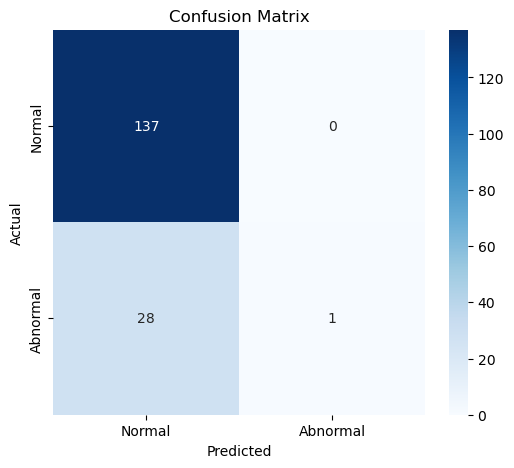

In [20]:
### Train Random Forest With Selected Features ###
X_train_ga = X_train_scaled[:, selected_features]
X_test_ga = X_test_scaled[:, selected_features]

model = RandomForestClassifier(random_state=42)
model.fit(X_train_ga, y_train)

# Predict on test data
y_pred_ga = model.predict(X_test_ga)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_ga)
acc = accuracy_score(y_test, y_pred_ga)
print(classification_report(y_test, y_pred_ga))

print(f"Test Accuracy: {acc:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Train Accuracy: 1.0000


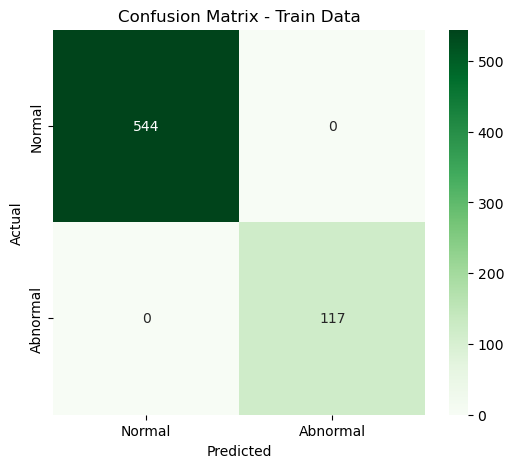

In [17]:
# Predict on train data
y_train_pred = rf_no_fs.predict(X_train_scaled)

# Compute confusion matrix for train data
cm_train = confusion_matrix(y_train, y_train_pred)
acc_train = accuracy_score(y_train, y_train_pred)

print(f"Train Accuracy: {acc_train:.4f}")

# Plot confusion matrix for train data
plt.figure(figsize=(6, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens', xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Train Data")
plt.show()